In [38]:
import numpy as np
from scipy.optimize import minimize

# Definir la función objetivo (cóncava)
def objective(x):
    return -1 * (x[0]**2 + x[1]**2)

# Definir las restricciones
constraints = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2},  # x[0] >= 2
               {'type': 'ineq', 'fun': lambda x: x[1] - 1})  # x[1] >= 1

# Valores iniciales
x0 = [0, 0]

# Llamar al optimizador
result = minimize(objective, x0, method='SLSQP', constraints=constraints)

print('Resultado de la maximización:', result.x)


TypeError: unsupported operand type(s) for *: 'int' and 'function'

In [35]:
import numpy as np
from scipy.optimize import minimize

# Valores exógenos
y = 10
beta = 1
epsilon = 1

# Definir la función objetivo (cóncava)
def objective(x):
    return np.sqrt(y - x[0] + x[1]) + beta * np.sqrt(x[0] + epsilon - x[1])

# Definir las restricciones
constraints = ({'type': 'ineq', 'fun': lambda x:  x[1]},  # x[1] >= 0
               {'type': 'ineq', 'fun': lambda x: y - x[0]},  # y - x[0] >= 0
               {'type': 'ineq', 'fun': lambda x: x[0] + epsilon - x[1]})  # x[0] + epsilon - x[1] >= 0  

# Valores iniciales
x0 = [1, 1]

# Llamar al optimizador
result = minimize(objective, x0, method='SLSQP', constraints=constraints)

print('Resultado de la maximización:', result.x)


Resultado de la maximización: [0.50000006 1.50000006]


C:\Users\OscarJaramillo\AppData\Local\Temp\ipykernel_20712\1312714313.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(y + x[0] - x[1]) + beta * np.sqrt(x[0] + epsilon - x[1])


In [30]:
tt = [0.12, 5]

np.sqrt(y + 0.12 - 5) + beta * np.sqrt(0.12 + epsilon - 5)

C:\Users\OscarJaramillo\AppData\Local\Temp\ipykernel_20712\2745074604.py:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(y + 0.12 - 5) + beta * np.sqrt(0.12 + epsilon - 5)


nan

C:\Users\OscarJaramillo\AppData\Local\Temp\ipykernel_20712\2992262485.py:12: RuntimeWarning: invalid value encountered in sqrt
  Z = np.sqrt(y + X0 - X1) + beta * np.sqrt(X0 + epsilon - X1)


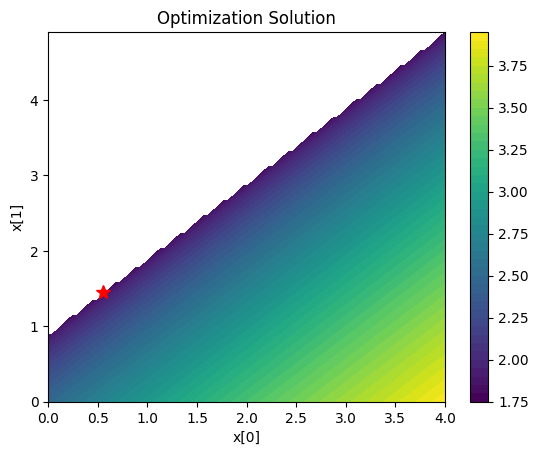

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Crear un rango de valores para x[0] y x[1]
x0_range = np.linspace(0, y, 100)
x1_range = np.linspace(0, y + epsilon, 100)

# Crear una malla de puntos
X0, X1 = np.meshgrid(x0_range, x1_range)

# Calcular los valores de la función objetivo en cada punto
Z = np.sqrt(y + X0 - X1) + beta * np.sqrt(X0 + epsilon - X1)

# Crear la figura y el eje
fig, ax = plt.subplots()

# Dibujar la función objetivo
contour = ax.contourf(X0, X1, Z, levels=50, cmap='viridis')

# Dibujar el punto de solución
ax.plot(result.x[0], result.x[1], 'r*', markersize=10)

# Añadir barra de colores
fig.colorbar(contour)

# Etiquetas y título
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_title('Optimization Solution')

plt.show()


C:\Users\OscarJaramillo\AppData\Local\Temp\ipykernel_20712\2800630394.py:9: RuntimeWarning: invalid value encountered in sqrt
  Z = np.sqrt(y + X0 - X1) + beta * np.sqrt(X0 + epsilon - X1)


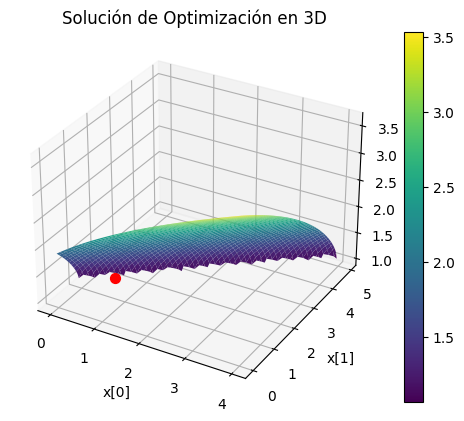

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crear una malla de puntos
X0, X1 = np.meshgrid(x0_range, x1_range)

# Calcular los valores de la función objetivo en cada punto
Z = np.sqrt(y + X0 - X1) + beta * np.sqrt(X0 + epsilon - X1)

# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar la función objetivo en 3D
surf = ax.plot_surface(X0, X1, Z, cmap='viridis', edgecolor='none')

# Dibujar el punto de solución
ax.scatter(result.x[0], result.x[1], np.sqrt(y + result.x[0] - result.x[1]) + beta * np.sqrt(result.x[0] + epsilon - result.x[1]), color='r', s=50)

# Añadir barra de colores
fig.colorbar(surf)

# Etiquetas y título
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('Función Objetivo')
ax.set_title('Solución de Optimización en 3D')

plt.show()
